In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import datetime

In [3]:
pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
df = pd.read_excel(r'C:\Users\KSSEEB\OneDrive\Documents\Machine Learning\multilinear regression\Heartattack_prediction_data.xlsx')

In [5]:
df.head()

,Sex,Age,Heart Rate,Glucose,BMI,Smoker,Ciggarates(Per Day),Hypertension,Systolic BP,Diastolic BP,ON BP Medication,Previous Stroke,Diabetic,RiskOfCHD
0,1,39,80.0,77.0,26.97,0,0.0,0,106.0,70.0,0.0,0,0,0
1,0,46,95.0,76.0,28.73,0,0.0,0,121.0,81.0,0.0,0,0,0
2,1,48,75.0,70.0,25.34,1,20.0,0,127.5,80.0,0.0,0,0,0
3,0,61,65.0,103.0,28.58,1,30.0,1,150.0,95.0,0.0,0,0,1
4,0,46,85.0,85.0,23.10,1,23.0,0,130.0,84.0,0.0,0,0,0


In [6]:
df.tail()

,Sex,Age,Heart Rate,Glucose,BMI,Smoker,Ciggarates(Per Day),Hypertension,Systolic BP,Diastolic BP,ON BP Medication,Previous Stroke,Diabetic,RiskOfCHD
4307,0,53,76.0,215.0,21.51,0,0.0,1,206.0,92.0,1.0,0,1,1
4308,0,49,65.0,98.0,20.68,0,0.0,0,96.0,63.0,0.0,0,0,0
4309,0,65,90.0,87.0,30.47,0,0.0,1,179.5,114.0,0.0,0,0,0
4310,1,46,75.0,74.0,23.59,1,20.0,0,119.0,77.5,0.0,0,0,0
4311,0,63,95.0,75.0,22.15,1,40.0,0,116.0,69.0,0.0,0,0,1


In [7]:
df.shape

(4312, 14)

In [8]:
df.columns

Index(['Sex', 'Age', 'Heart Rate', 'Glucose', 'BMI', 'Smoker',
       'Ciggarates(Per Day)', 'Hypertension', 'Systolic  BP', 'Diastolic BP',
       'ON BP Medication', 'Previous Stroke', 'Diabetic', 'RiskOfCHD'],
      dtype='object')

In [9]:
df.dtypes

Sex                      int64
Age                      int64
Heart Rate             float64
Glucose                float64
BMI                    float64
Smoker                   int64
Ciggarates(Per Day)    float64
Hypertension             int64
Systolic  BP           float64
Diastolic BP           float64
ON BP Medication       float64
Previous Stroke          int64
Diabetic                 int64
RiskOfCHD                int64
dtype: object

In [10]:
df.isnull().sum()

Sex                      0
Age                      0
Heart Rate               1
Glucose                200
BMI                     19
Smoker                   0
Ciggarates(Per Day)     29
Hypertension             0
Systolic  BP             0
Diastolic BP             0
ON BP Medication        52
Previous Stroke          0
Diabetic                 0
RiskOfCHD                0
dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

Sex                    0
Age                    0
Heart Rate             0
Glucose                0
BMI                    0
Smoker                 0
Ciggarates(Per Day)    0
Hypertension           0
Systolic  BP           0
Diastolic BP           0
ON BP Medication       0
Previous Stroke        0
Diabetic               0
RiskOfCHD              0
dtype: int64

In [13]:
df.duplicated().sum()

np.int64(68)

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
df.shape

(3949, 14)

In [17]:
(3949/4312)*100  #the data we have

91.58163265306123

In [18]:
(3949/4312)*100-100  # the data we lost

-8.418367346938766

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3949 entries, 0 to 4305
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sex                  3949 non-null   int64  
 1   Age                  3949 non-null   int64  
 2   Heart Rate           3949 non-null   float64
 3   Glucose              3949 non-null   float64
 4   BMI                  3949 non-null   float64
 5   Smoker               3949 non-null   int64  
 6   Ciggarates(Per Day)  3949 non-null   float64
 7   Hypertension         3949 non-null   int64  
 8   Systolic  BP         3949 non-null   float64
 9   Diastolic BP         3949 non-null   float64
 10  ON BP Medication     3949 non-null   float64
 11  Previous Stroke      3949 non-null   int64  
 12  Diabetic             3949 non-null   int64  
 13  RiskOfCHD            3949 non-null   int64  
dtypes: float64(7), int64(7)
memory usage: 462.8 KB


In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sex,3949.0,0.436313,0.495990,0.00,0.00,0.00,1.00,1.0
Age,3949.0,49.549253,8.561709,32.00,42.00,49.00,56.00,70.0
Heart Rate,3949.0,75.794125,12.017503,44.00,68.00,75.00,83.00,143.0
Glucose,3949.0,82.040010,23.496781,40.00,72.00,78.00,87.00,394.0
BMI,3949.0,25.797371,4.067156,15.54,23.08,25.38,28.04,56.8
Smoker,3949.0,0.489997,0.499963,0.00,0.00,0.00,1.00,1.0
Ciggarates(Per Day),3949.0,9.031907,11.962920,0.00,0.00,0.00,20.00,70.0
Hypertension,3949.0,0.309952,0.462532,0.00,0.00,0.00,1.00,1.0
Systolic BP,3949.0,132.273614,21.939643,83.50,117.00,128.00,143.50,295.0
Diastolic BP,3949.0,82.869840,11.881098,48.00,75.00,82.00,89.50,142.5


In [21]:
col1 = df.iloc[:,1:8]
col2 = df.iloc[:,8:]

Age


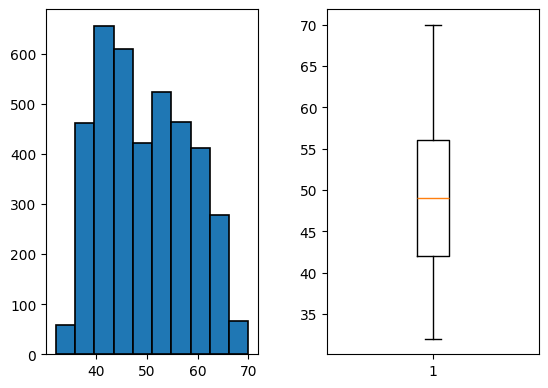

Heart Rate


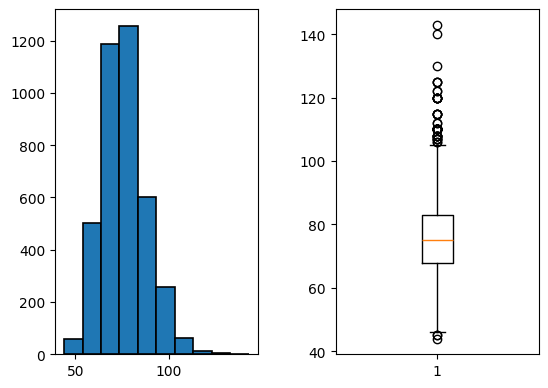

Glucose


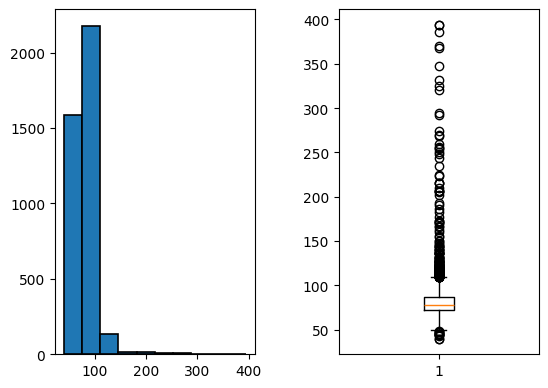

BMI


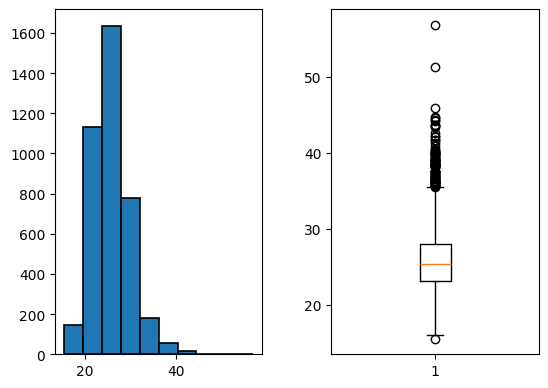

Smoker


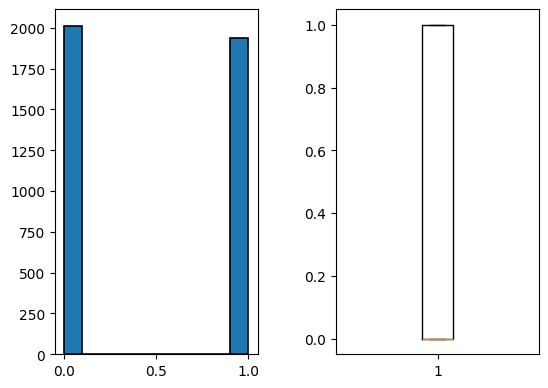

Ciggarates(Per Day)


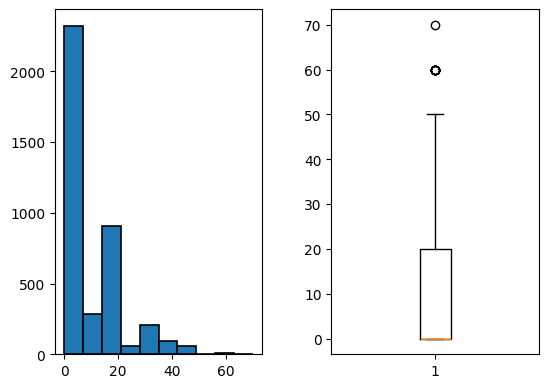

Hypertension


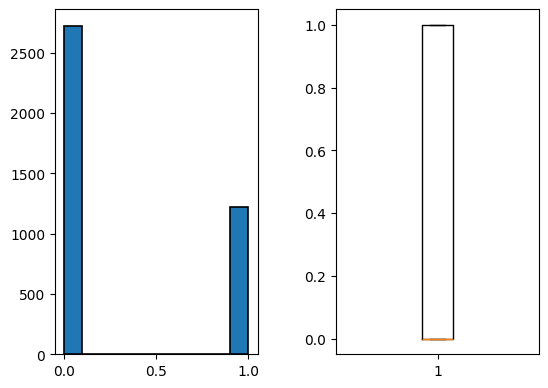

In [22]:
for i in col1:
    print(i)

    plt.figure()
    plt.subplot(1,2,1)
    df[i].hist(grid=False , edgecolor= 'black',linewidth=1.2)

    plt.subplot(1,2,2)
    plt.boxplot(df[i])
    plt.tight_layout(pad=4,w_pad=3,h_pad=3)
    plt.show()

Systolic  BP


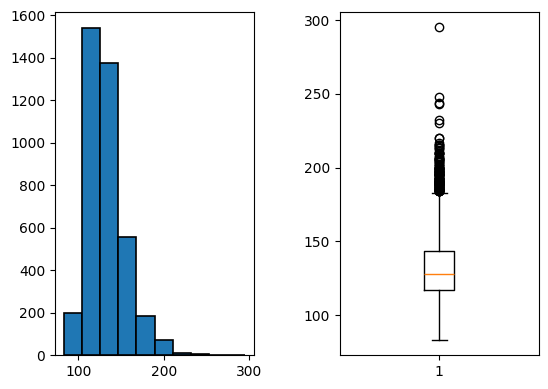

Diastolic BP


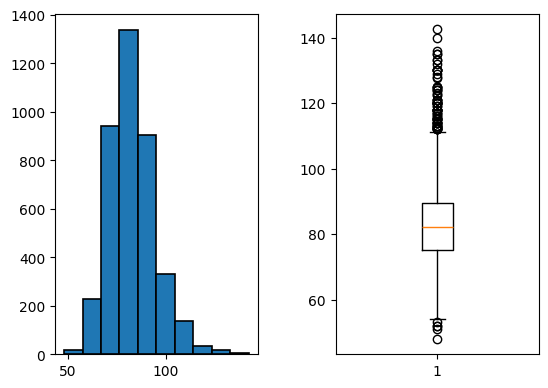

ON BP Medication


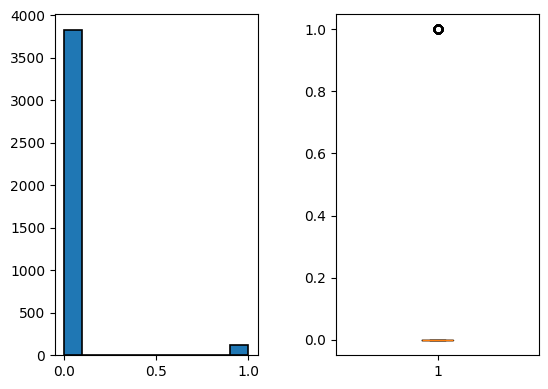

Previous Stroke


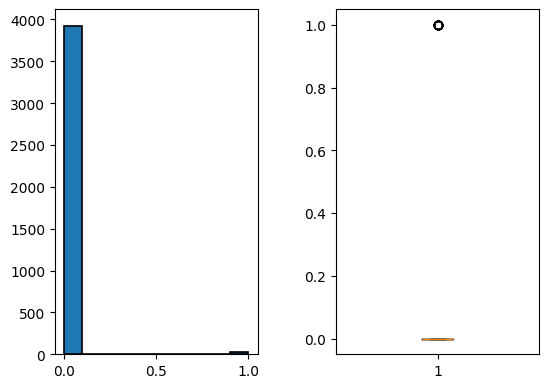

Diabetic


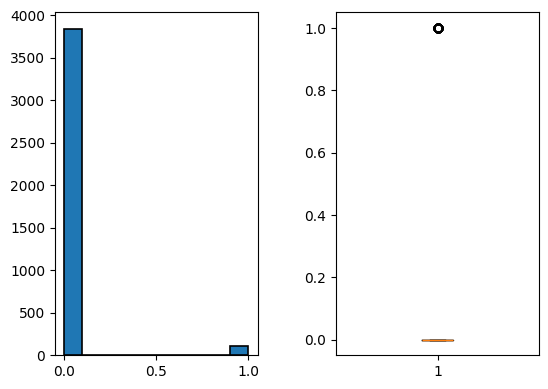

RiskOfCHD


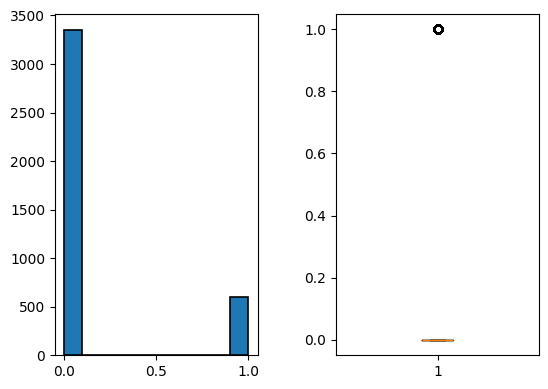

In [23]:
for i in col2:
    print(i)

    plt.figure()
    plt.subplot(1,2,1)
    df[i].hist(grid=False , edgecolor= 'black',linewidth=1.2)

    plt.subplot(1,2,2)
    plt.boxplot(df[i])  # we can add plt.plot(df[i],kind='density')
    plt.tight_layout(pad=4,w_pad=3,h_pad=3)
    plt.show()

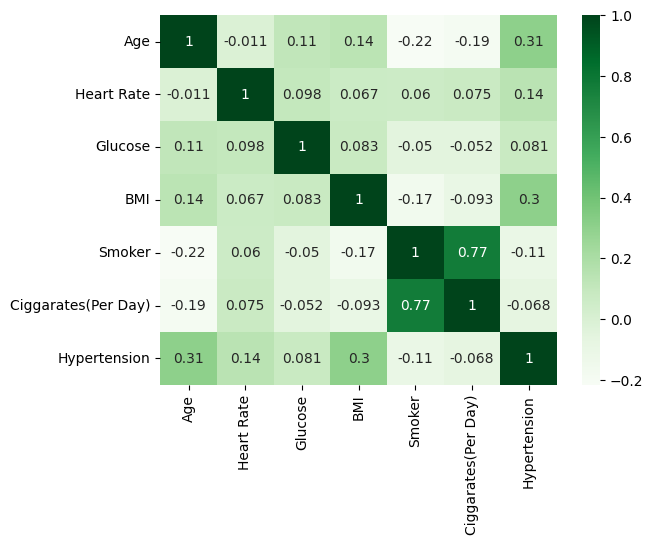

In [24]:
corr = df.iloc[:,1:8].corr(method='pearson')
sns.heatmap(corr,annot=True,cmap='Greens')
plt.show()

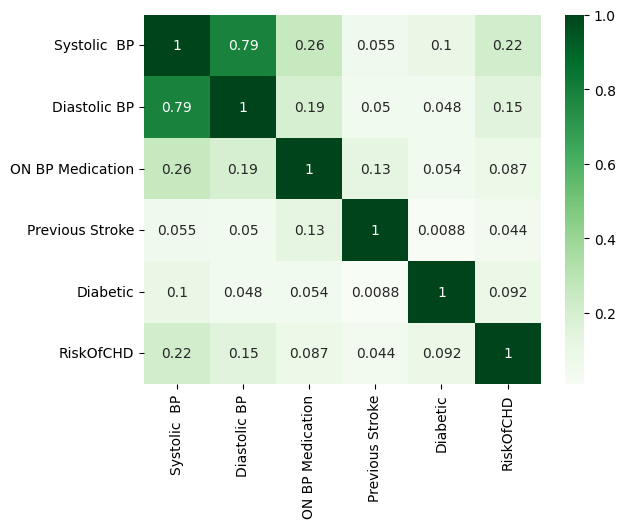

In [25]:
corr = df.iloc[:,8:].corr(method='pearson')
sns.heatmap(corr,annot=True,cmap='Greens')
plt.show()

In [26]:
df.groupby('Sex')['RiskOfCHD'].count()

Sex
0    2226
1    1723
Name: RiskOfCHD, dtype: int64

In [27]:
df.groupby('Sex')['Heart Rate'].count().sort_values(ascending=False)

Sex
0    2226
1    1723
Name: Heart Rate, dtype: int64

In [28]:
df.groupby('Smoker')['RiskOfCHD'].count().sort_values(ascending=False)

Smoker
0    2014
1    1935
Name: RiskOfCHD, dtype: int64

In [29]:
df.groupby('Hypertension')['RiskOfCHD'].count().sort_values(ascending=False)

Hypertension
0    2725
1    1224
Name: RiskOfCHD, dtype: int64

In [30]:
df.groupby('Diabetic')['RiskOfCHD'].count().sort_values(ascending=False)

Diabetic
0    3844
1     105
Name: RiskOfCHD, dtype: int64

In [31]:
df.columns

Index(['Sex', 'Age', 'Heart Rate', 'Glucose', 'BMI', 'Smoker',
       'Ciggarates(Per Day)', 'Hypertension', 'Systolic  BP', 'Diastolic BP',
       'ON BP Medication', 'Previous Stroke', 'Diabetic', 'RiskOfCHD'],
      dtype='object')

In [32]:
X = df[['Sex','Age','Smoker','Hypertension','Systolic  BP','Diastolic BP']]
y = df['RiskOfCHD']

In [33]:
scale = StandardScaler()
x = scale.fit_transform(X)
x

array([[ 1.13663216, -1.23229946, -0.98019109, -0.67020468, -1.19769228,
        -1.08335698],
       [-0.8797921 , -0.41460211, -0.98019109, -0.67020468, -0.5139118 ,
        -0.15739937],
       [ 1.13663216, -0.18097429,  1.02020923, -0.67020468, -0.21760692,
        -0.24157733],
       ...,
       [-0.8797921 , -0.76504383, -0.98019109, -0.67020468, -0.39994838,
        -0.45202224],
       [-0.8797921 ,  1.22079259, -0.98019109, -0.67020468, -1.01535082,
        -0.87291207],
       [-0.8797921 ,  0.28628134, -0.98019109,  1.4920815 ,  0.71689308,
         0.76855825]])

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [35]:
model= LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [36]:
y_pred = model.predict(X_test)
y_pred

array([ 0.25704076, -0.01300775,  0.14368992,  0.12266765,  0.1146813 ,
        0.29981926,  0.05169811,  0.23789111,  0.28132197,  0.21616937,
       -0.02638821,  0.12865515,  0.25990124,  0.12216579,  0.11785387,
        0.04817924,  0.18813497,  0.06276937,  0.07161513,  0.1914818 ,
        0.19924645,  0.14471387, -0.01927115,  0.1564988 ,  0.0958435 ,
        0.1168135 ,  0.08834173,  0.28101119,  0.09537562,  0.25397046,
        0.02063369,  0.02583161,  0.24670914,  0.28912753,  0.10390736,
        0.02447949,  0.28362514,  0.06444773,  0.30028562,  0.16236669,
        0.21053982,  0.03241153,  0.20076334,  0.34528684,  0.15766445,
        0.29867009,  0.30798902,  0.2103767 ,  0.08151416,  0.23282108,
        0.30130535,  0.09685779,  0.26968817,  0.15062756,  0.19673801,
        0.23597457,  0.26276281,  0.15859198,  0.13978651,  0.30791829,
        0.21153779, -0.00396075,  0.04196124,  0.05387503,  0.01529788,
        0.00593185,  0.20077618,  0.23517652,  0.17009153,  0.02

In [37]:
#evaluate the model
rmse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print('rmse:', rmse)
print('r2_score:', r2)

rmse: 0.11385688367397963
r2_score: 0.07114833661088515


In [38]:
#
print(f'coefficient:{model.coef_}')
print(f'intercept: {model.intercept_}')

coefficient:[ 0.07849381  0.00776477  0.0395761   0.02636251  0.00255958 -0.00118485]
intercept: -0.532532495053833


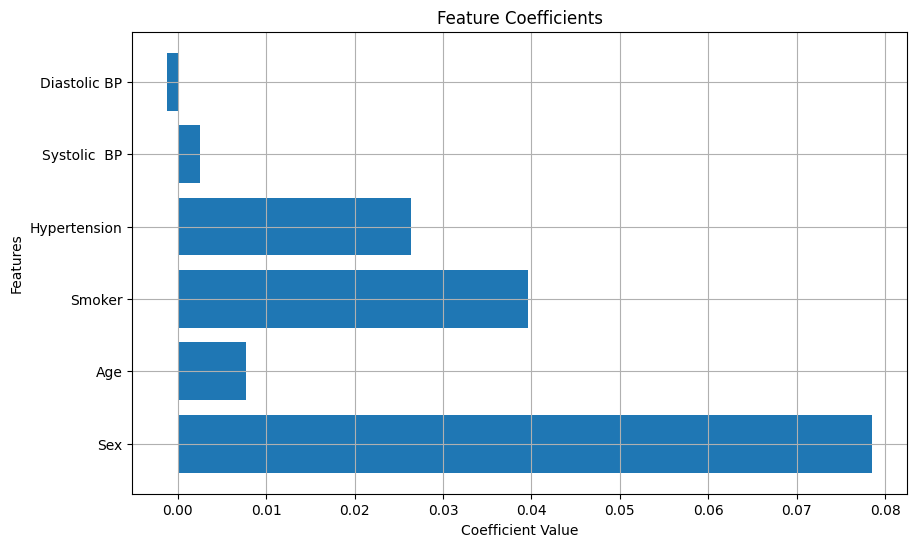

In [39]:
# Plotting the coefficients
features = X.columns  # Names of the features
coefficients = model.coef_  # Coefficients from the model

plt.figure(figsize=(10, 6))
plt.barh(features, coefficients)
plt.title('Feature Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.grid(True)
plt.show()